# Neuronas Artificiales

Las neuronas son celulas biologicas interconectadas en el cerebreo que participan en el proceso y la transmision de señales electricas y quimicas, como se ve en la siguiente figura:

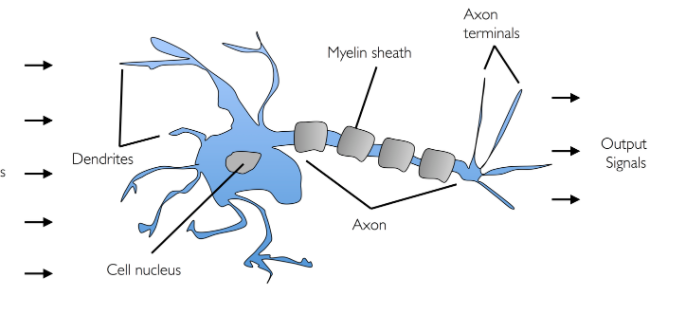

Multiples señales llegan a las dendritas, luego se integran al cuerpo de la celula, y si la señal acumulada supera un umbral determinado, se genera una señal de salida que sera conducioda por el axon.



## Neurona artificial, definicion formal

Para definirla adecuadamente, vamos a suponer una tarea de **clasificacion** binaria, teniendo como referencia dos clases 1 o positiva y -1 o negativa.

Adicional a ello, vamos a considerar que la señal de entrada estara dada por cada fila de la matriz de caracteristicas $X$, de tal manera que por cada dendrita entrara un valor $x_i^{(j)}$; a partir de la entrada inicial de estos valores, estos se combinaran con unos pesos estadisticos que determinan la relevancia de cada caracteristica; esta combinacion sera una combinacion lineal que llamaremos $z$:

$$ z = w_1x_1+w_2x_2+\dots +w_mx_m$$

En la anterior ecuacion se asume que cada entrada tiene $m$ diferentes caracteristicas.

Esta funcion debera pasar a traves de una funcion umbral que determinara si la señal es transmitida o no, dependiendo de si se supera un cierto valor que debemos definir. Si se supera el umbral, la entrada $x^{(i)}$ se clasificara como 1, y si no como -1:

$$\phi(z)=\begin{cases}{1}&\text{si}& z\geq 0 \\-1 & \text{en otro caso}\\\end{cases}$$

Para que todo funcione correctamente, debemos agregar a la definicion de $z$, un valor de sego o **bias** que representara el valor de $z$ cuando todas las caracteristicas valgan 0. Con esto, $z$ se redefine como:

$$ z = w_0 + w_1x_1+w_2x_2+\dots +w_mx_m$$

En terminos del algebra lineal, se puede reescribir la definicion de $z$ de la siguiente manera:

$$ z = \textbf{w}^T\textbf{x}$$

Por lo tanto, $\phi(z)$ se puede reescribir como $\phi(\textbf{w}^T\textbf{x})$. La siguiente imagen muestra como funcionara la funcion umbral para la calsificacion de las entradas:

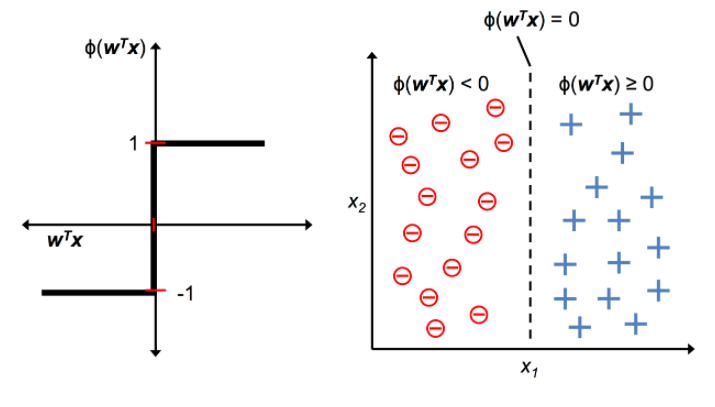

## La regla de aprendizaje del perceptron

Hasta  el momento el algoritmo no tiene la capacidad de aprender, pues si llega a cometer errores en la clasificacion, no va  a ser capaz de depurarlos y aprender de ellos. DEbemos definir una regla que le permita al algoritmo aprender de sus errores. Dicha regla se llamara la _regla de aprendizaje del perceptron_. Esta regla se puede dividir en los siguientes pasos:

1. Iniciar los pesos a numeros aleatorios pequeños diferentes de cero.

2. Para cada muestra de entrenamineto $x^{(i)}$:

    a. Calcular el valor de salida $\hat{y}$.
    
    b. Actualizar los pesos\.
    
Recordar que el valor de salida es la etiqueta de clase, que puede ser 1 o -1; la actualizacion de los pesos estara dada de la siguiente manera:

$$w_j:=w_j+\Delta w_j$$

En donde la tarea recae en hallar los valores de $\Delta w_j$. Para hallar dichos valores, se utilizara la siguiente ecuacion:

$$\Delta w_j = \eta(y^{(i)}-\hat{y}^{(i)})x_j^{(i)}$$

En donde $\eta$ se conoce como el rango de aprendizaje (constante con valores entre 0.0 y 1.0). 

$y^{(i)}$ es la etiqueta de clase verdadera y $\hat{y}^{(i)}$ es la etiqueta de clase predicha. 

Todos los pesos deben ser actualizados al mismo tiempo. La actualizacion de los pesos sera directamente proporcional a los valores $x_j^{(i)}$.

Es importante tener en cuenta que la convergencia del perceptron, solo esta garantizada si las dos clases son linealmente separables, de lo contrario, el modelo seguira actualizando indefinidamente los pesos y nunca terminara. Si no se puede garantizar que los datos sean linealmente separables, se puede optar por limitar el modelo a un cierto numero de epocas para que pare segun estas epocas.

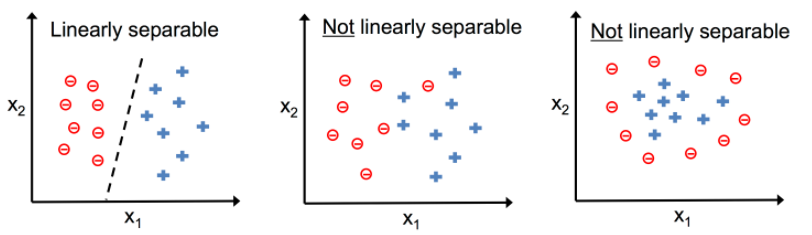

En el siguiente diagrama se resume todo el proceso de la aplicacion del perceptron:

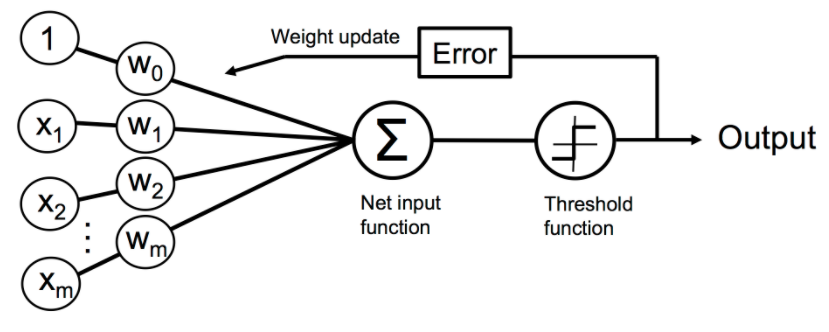

## Implementando un algoritmo de aprendizaje de perceptron

In [1]:
# Librerias a utilizar
# =======================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error as rmse
plt.style.use('seaborn')
import warnings
warnings.filterwarnings("ignore")

In [8]:
# Definicion de clase
# =======================================================
class Perceptron:
    '''
    Parametros
    -------------------------------
        eta : float
            Razon de aprendizaje (entre 0.0 y 1.0)
        n_iter : int
            El numero de iteraciones sobre el training set
        random_state : int
            Semilla para la generacion de numeros aleatorios
            
    Atributos
    -------------------------------
    w_ : 1d-array
        Pesos obtenidos del ajuste
    errors_ : list
        Numero de errores en la clasificacion en cada iteracion (epoca)
    '''
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        '''Constructor de la clase con valores predeterminados'''            
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        '''Funcion encargada de ajustar los datos al modelo
        Parametros
        ------------------
        X : matriz de entrenamiento; shape = [n_sample, n_caracteristicas]
        y : matriz de salida; shape = [n_samples]
        
        Returns
        ------------------
        self : object
        '''
        # Fijar una semilla para los numeros aleatorios (opcional)
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale = 0.01, size = 1 + X.shape[1]) # .shape: n_filas, n_columnas
        
        # Se acumularan los errores para su posterior verificacion
        self.errors_ = []
        
        # Se realiza un ciclo sobre el numero de epocas predefinidas
        for _ in range(self.n_iter):
            errors = 0
            # Se realiza un ciclo sobre cada entrada(fila) de la matriz X
            for xi, yi in zip(X, y):
                update = self.eta * (yi - self.predict(xi))  # Actualizacion de los pesos
                self.w_[1:] += update * xi                   # Actualizo los pesos
                self.w_[0] += update                         # Se actualiza el peso 0
                errors += int(update != 0.0)                 # Se suman los errores
            self.errors_.append(errors)                      # Se guardan los errores de ese ciclo
        return self
    
    # Se calcula la entrada de la red Wt*x+b.
    #Este resultado dara un numero > 0 o < 0
    def net_input(self, X):
        '''Calcula la entrada de red'''
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    # Se realiza la prediccion segun los valores de X
    def predict(self, X):
        '''Retorna la etiqueta de clase despues del paso unitario'''
        return np.where(self.net_input(X) >= 0.0, 1, -1)


## Implementar el algoritmo de perceptron usando iris

In [9]:
datos = pd.read_csv('iris.csv')
datos.head(3)

SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa

In [10]:
# Voy a trabajar con dos categorias unicamente: Iris-setosa e Iris-versicolos
datos = datos[(datos['Name'] == 'Iris-setosa') | (datos['Name'] == 'Iris-versicolor')]
X = datos.iloc[:, [0, 2]].values

# A iris-setosa le colocare la categoria 1 y a Iris-versicolor, la categoria -1
y = datos['Name'].values
y = np.where(y == 'Iris-setosa', 1, -1)

In [5]:
y

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

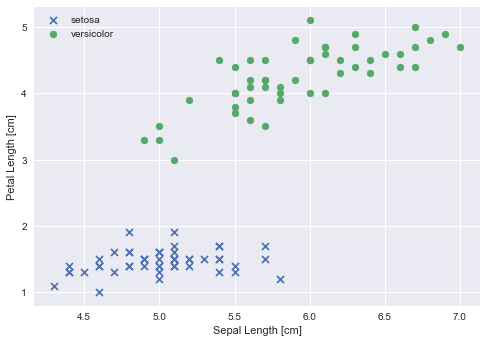

In [11]:
# Representar los datos
fig, ax = plt.subplots()

ax.scatter(X[:50, 0], X[:50, 1], marker = 'x', label='setosa')
ax.scatter(X[50:, 0], X[50:, 1], marker = 'o', label='versicolor')
ax.set_xlabel('Sepal Length [cm]')
ax.set_ylabel('Petal Length [cm]')
plt.legend();

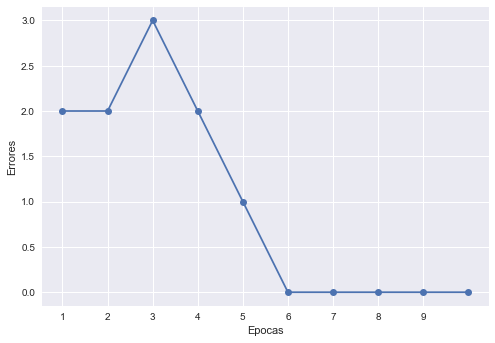

In [12]:
modelo = Perceptron(eta = 0.1, n_iter = 10)
modelo.fit(X, y)

fig, ax = plt.subplots()
ax.plot(range(1, len(modelo.errors_)+1), modelo.errors_, marker = 'o')
ax.set_xlabel('Epocas')
ax.set_ylabel('Errores')
ax.set_xticks(np.arange(1, 10));

In [13]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

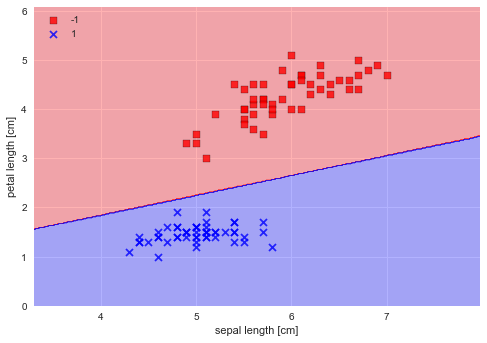

In [14]:
plot_decision_regions(X, y, classifier = modelo)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [17]:
modelo.predict([6, 5])

array(-1)

<span class="burk">EJERCICIOS</span>

1. Modifique la clase Perceptron para agregar un metodo que permita calcular el rmse de los datos. Para esto recuerde que

    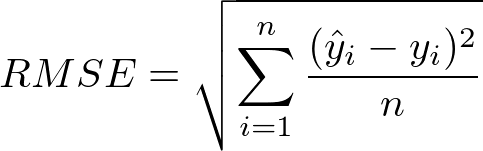

    Tambien puede calcularla usando sklearn:
        from sklearn.metrics import mean_squared_error as rmse
        rmse(y_true, y_pred)

2. Use la nueva clase perceptron para clasificar los datos de todas las caracteristicas del dataset iris y calcule su rmse. Graficar sus errores. :(. 